In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [3]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}
num_trees = {"Ghost": 150,
            "Electron": 200,
            "Muon": 130,
            "Pion": 110,
            "Kaon": 100,
            "Proton": 180}

In [6]:
params_ghost = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .2,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}
params_ele = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}
params_muon = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}
params_pion = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .25,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}
params_kaon = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .15,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}
params_proton = {
    'nthread': 10,
    'eval_metric': 'logloss',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 0
}

## One-vs-all test

In [7]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [8]:
def get_xgboost(train, test, pid, feature_dict, xgb_params, tree_dict):
    train_w = np.ones(train.shape[0])
    pw = train.shape[0]/(np.abs(train.MCParticleType.values) == pid_dict[pid]).sum()
    npw = train.shape[0]/(np.abs(train.MCParticleType.values) != pid_dict[pid]).sum()
    train_w[np.abs(train.MCParticleType.values) == pid_dict[pid]] *= pw
    train_w[np.abs(train.MCParticleType.values) != pid_dict[pid]] *= npw
    
    dtrain = xgb.DMatrix(train[feature_dict[pid]], 
                     label=(np.abs(train.MCParticleType.values) == pid_dict[pid]).astype('int'),
                     feature_names=feature_dict[pid], weight=train_w)
    dtest = xgb.DMatrix(test[feature_dict[pid]], feature_names=feature_dict[pid])
    
    final_gbm = xgb.train(xgb_params, dtrain, num_boost_round=tree_dict[pid], verbose_eval=False)
    
    preds = final_gbm.predict(dtest)
    return preds

In [9]:
ele_preds = get_xgboost(train, test, 'Electron', old_features, params_ele, num_trees)
ghost_preds = get_xgboost(train, test, 'Ghost', old_features, params_ghost, num_trees)
muon_preds = get_xgboost(train, test, 'Muon', old_features, params_muon, num_trees)
pion_preds = get_xgboost(train, test, 'Pion', old_features, params_pion, num_trees)
kaon_preds = get_xgboost(train, test, 'Kaon', old_features, params_kaon, num_trees)
proton_preds = get_xgboost(train, test, 'Proton', old_features, params_proton, num_trees)

In [10]:
target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0*np.ones((y_test == pid_dict['Ghost']).sum())
target_m[y_test == pid_dict['Muon']] = 1*np.ones((y_test == pid_dict['Muon']).sum())
target_m[y_test == pid_dict['Pion']] = 2*np.ones((y_test == pid_dict['Pion']).sum())
target_m[y_test == pid_dict['Kaon']] = 3*np.ones((y_test == pid_dict['Kaon']).sum())
target_m[y_test == pid_dict['Proton']] = 4*np.ones((y_test == pid_dict['Proton']).sum())
target_m[y_test == pid_dict['Electron']] = 5*np.ones((y_test == pid_dict['Electron']).sum())

preds = np.zeros((len(ele_preds), 6))
preds[:, 0] = ghost_preds
preds[:, 1] = muon_preds
preds[:, 2] = pion_preds
preds[:, 3] = kaon_preds
preds[:, 4] = proton_preds
preds[:, 5] = ele_preds

label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

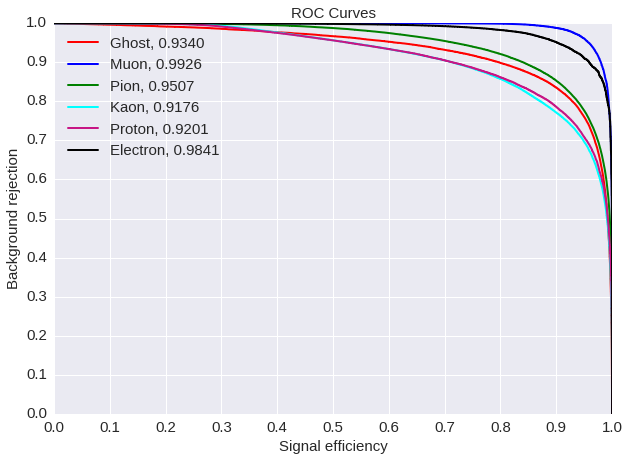

In [11]:
utils.get_roc_curves(target_m, preds, label_list)

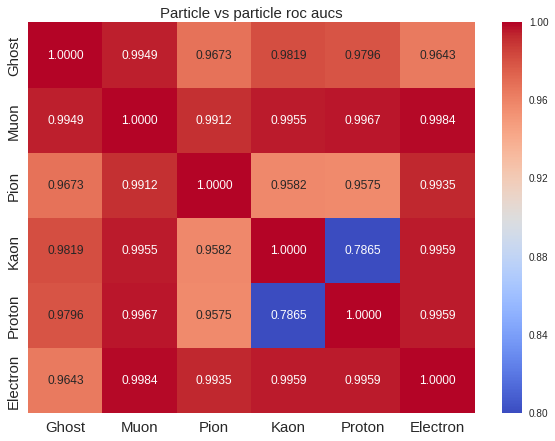

In [12]:
mat = utils.get_roc_auc_matrix(target_m, preds, label_list)

In [13]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col='Unnamed: 0')

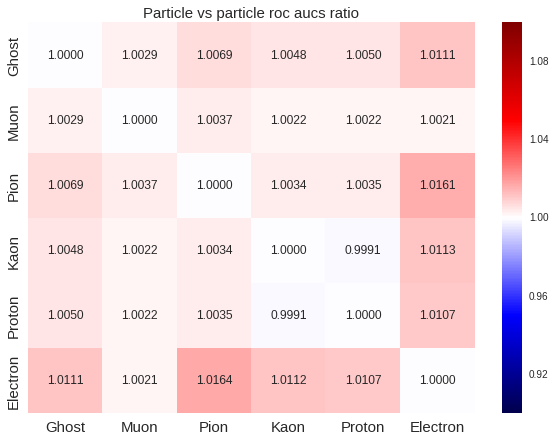

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.002910,1.006883,1.004754,1.004951,1.011075
Muon,1.002910,1.000000,1.003696,1.002176,1.002237,1.002056
Pion,1.006883,1.003671,1.000000,1.003376,1.003475,1.016080
Kaon,1.004754,1.002176,1.003376,1.000000,0.999147,1.011261
Proton,1.004951,1.002237,1.003474,0.999147,1.000000,1.010694
Electron,1.011075,1.002059,1.016413,1.011227,1.010698,1.000000


In [14]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

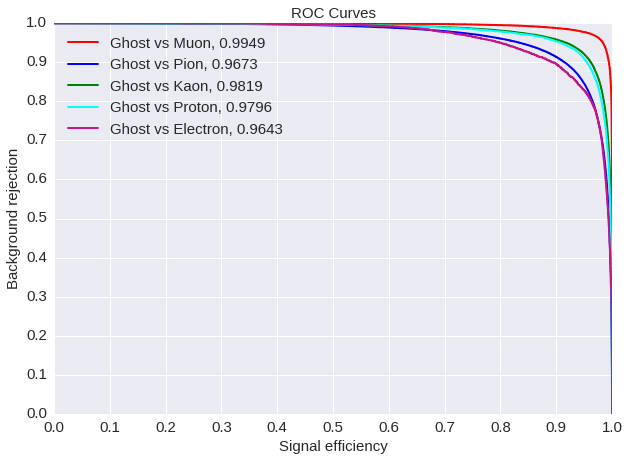

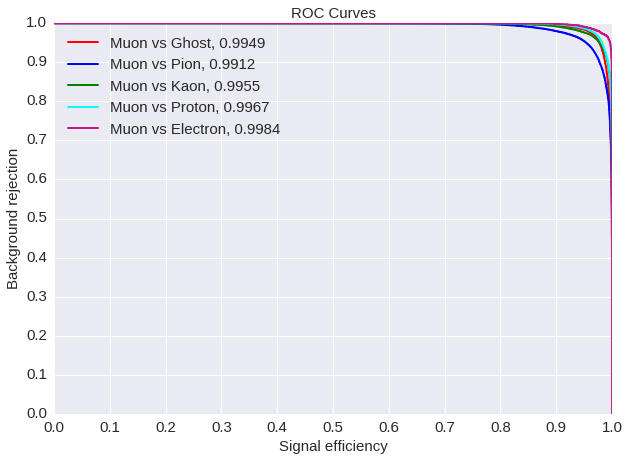

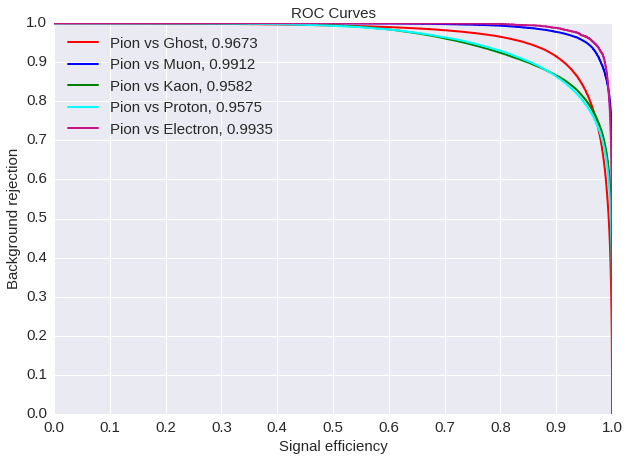

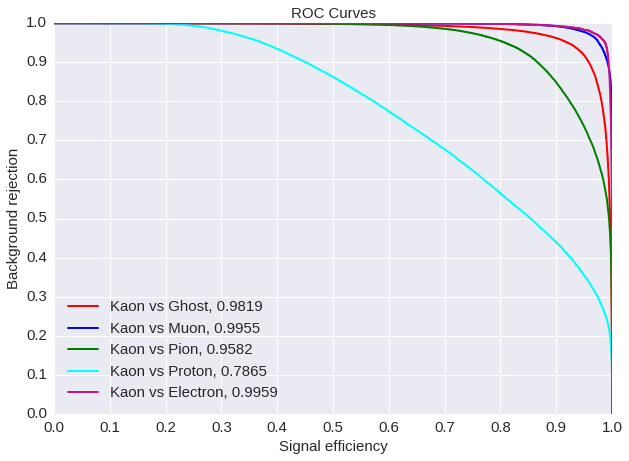

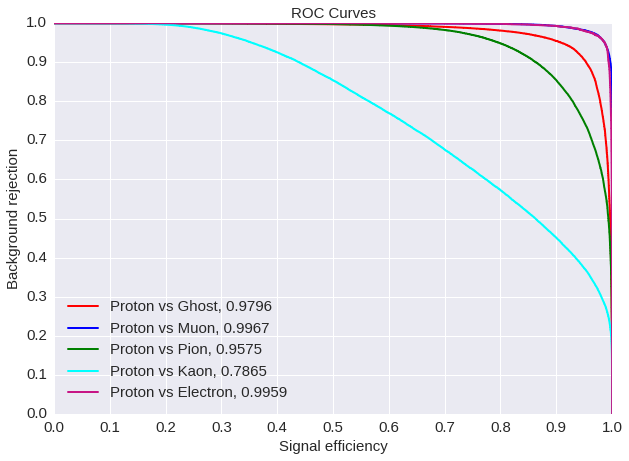

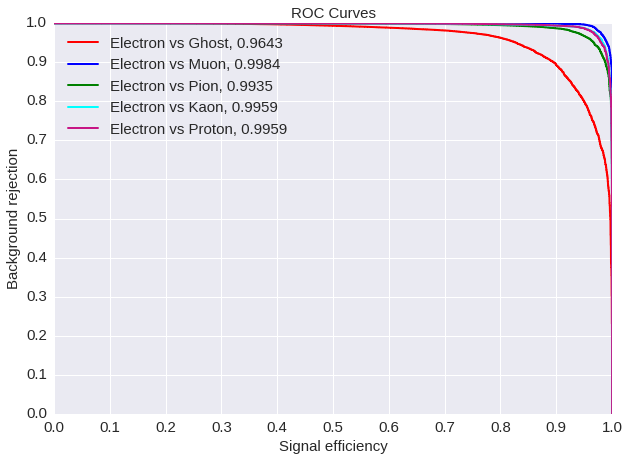

In [15]:
utils.get_one_vs_one_roc_curves(target_m, preds, label_list)

In [16]:
fl = utils.get_flatness_table(test, target_m, preds, label_list)

In [17]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.007891,0.026459,0.000869,0.000869
Muon,0.030798,0.059006,0.000916,0.000903
Pion,0.016945,0.015535,0.000854,0.000851
Kaon,0.041061,0.039298,0.000880,0.000881
Proton,0.034600,0.048662,0.000886,0.000883
Electron,0.007344,0.026530,0.000997,0.001009


In [18]:
flatness_baseline = pd.read_csv("./PID/python/flatness_baseline.csv", index_col=0)
utils.get_flatness_ratio(fl, flatness_baseline)

,TrackP,TrackPt
Ghost,1.197221,1.864973
Muon,1.510595,1.311505
Pion,1.026237,1.131603
Kaon,0.953274,1.072031
Proton,0.999076,1.091776
Electron,1.121853,1.600189


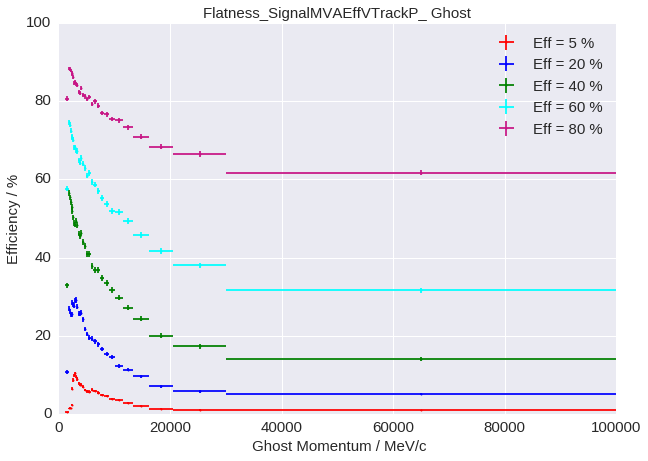

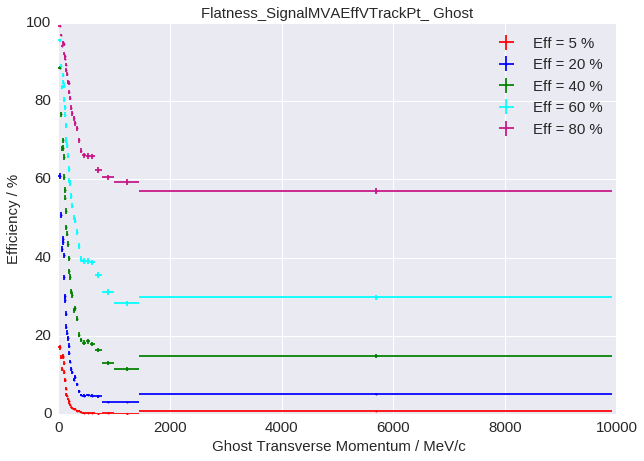

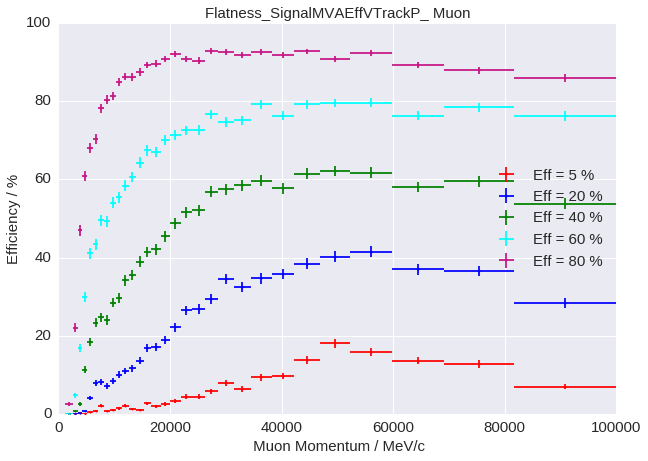

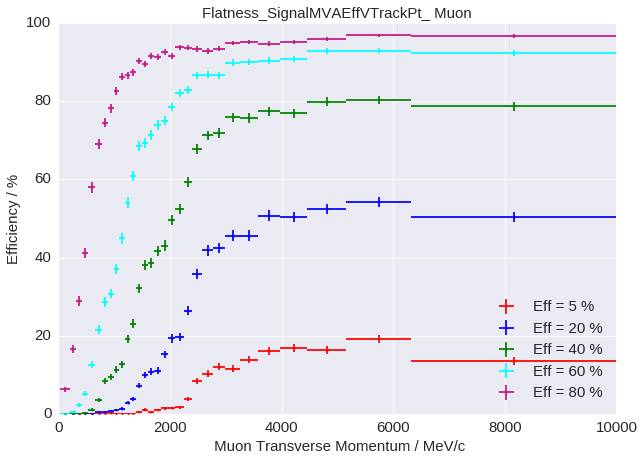

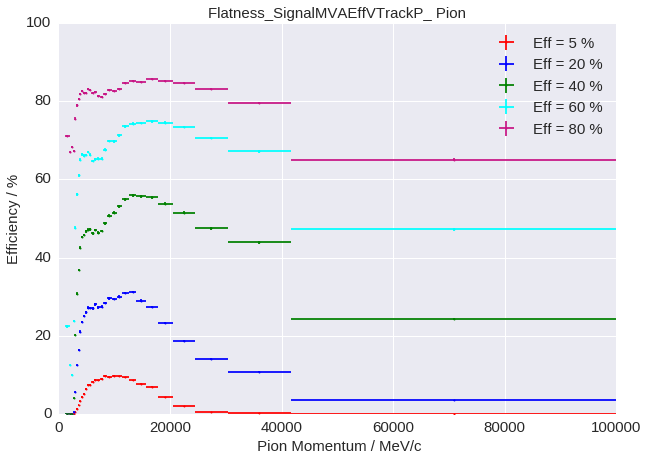

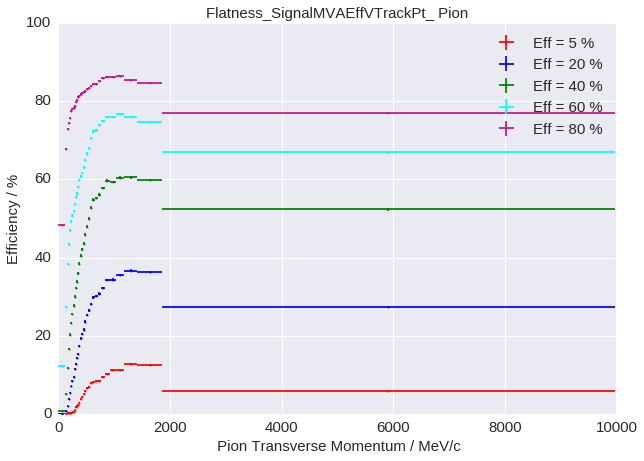

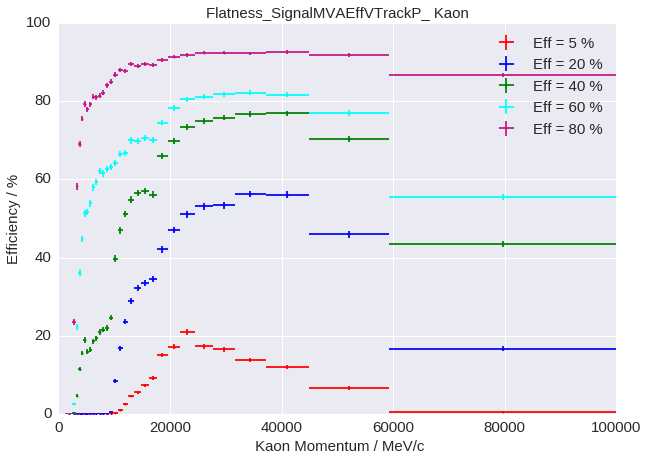

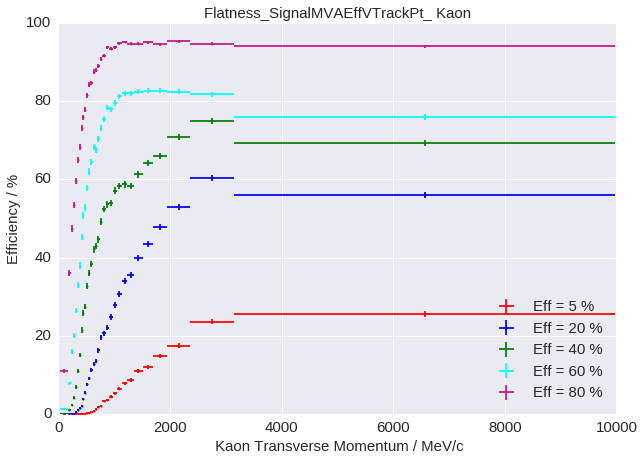

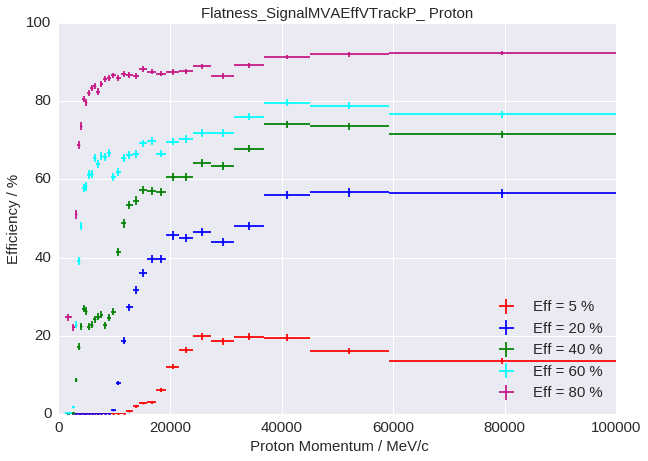

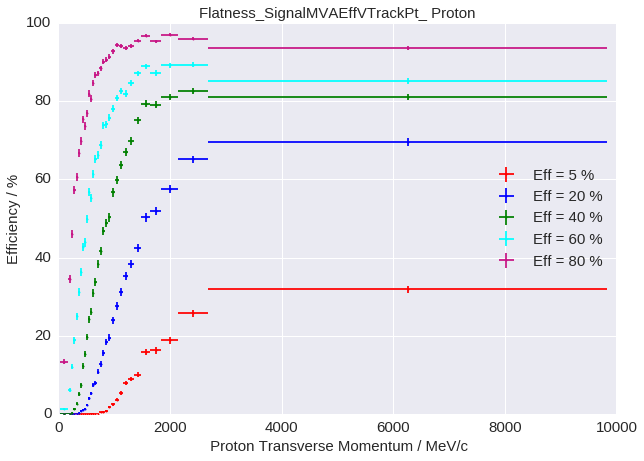

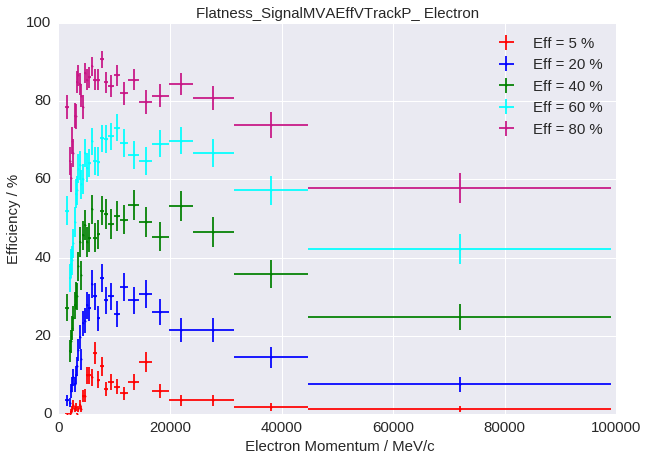

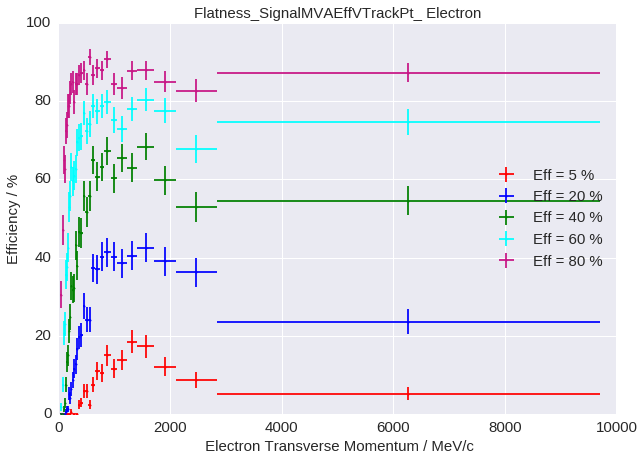

In [19]:
utils.get_all_flatness_figures(test, preds, target_m, '', label_list, show=True)

In [20]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0

for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Logloss:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.9705
Logloss: 0.622939851838
Mean flatness: 0.0295106634613
